In [50]:
using Plots

function cdot(t, c, w, r)
    
    return b - c * ( β + b - μ)
end

cdot (generic function with 1 method)

In [51]:
function wdot(t, c, w, r)
    
    return c * β - w * (γ + b - μ)
end

wdot (generic function with 1 method)

In [52]:
function rdot(t, c, w, r)
    
    return w * γ - r * (b - μ) - μ
end

rdot (generic function with 1 method)

In [53]:
function Ct(t, c, w, r)
    
    Power1 = e^(λ1 * t)
    Power2 = e^(λ2 * t)
    Power3 = e^(λ3 * t)
    
    return C_ + D1 * Power1
end

Ct (generic function with 1 method)

In [54]:
function Wt(t, c, w, r)
    
    Power1 = e^(λ1 * t)
    Power2 = e^(λ2 * t)
    
    return W_ + D2 * Power1 + D3 * Power2 
end

Wt (generic function with 1 method)

In [55]:
function Rt(t, c, w, r)
    
    Power1 = e^(λ1 * t)
    Power2 = e^(λ2 * t)
    Power3 = e^(λ3 * t)
    
    return R_ - D4 * Power1 - D3 * Power2 + D5 * Power3
    
end

Rt (generic function with 1 method)

In [56]:
function Analytical(t0, c0, w0, r0)
    
    h = 0.1
    n = 3510
    
    T = []
    C = []
    W = []
    R = []
    
    t = t0
    
    for k in 1:n-1
        
        c = Ct(t, c0, w0, r0)
        w = Wt(t, c0, w0, r0)
        r = Rt(t, c0, w0, r0)
        
        push!(T, t)
        push!(C, c)
        push!(W, w)
        push!(R, r)
        
        t += h
        
    end
    
    return T, C, W, R
    
end

Analytical (generic function with 1 method)

In [57]:
function Euler(t0, c0, w0, r0)
    
    h = 0.1
    n = 3510
    
    T = zeros(n, 1)
    C = zeros(n, 1)
    W = zeros(n, 1)
    R = zeros(n, 1)
    
    T[1] = t0
    C[1] = c0
    W[1] = w0
    R[1] = r0
    
    for t in 1:n-1
        
        Kc1 = cdot(T[t],C[t],W[t],R[t])
        Kw1 = wdot(T[t],C[t],W[t],R[t])
        Kr1 = rdot(T[t],C[t],W[t],R[t])
        
        C[t+1]=C[t] + h * Kc1
        W[t+1]=W[t] + h * Kw1
        R[t+1]=R[t] + h * Kr1
        T[t+1]=T[t] + h
        
    end
        
    return T, C, W, R
    
end

Euler (generic function with 1 method)

In [58]:
function Runge_Kutte4(t0, c0, w0, r0)
    
    h = 0.1
    n = 3510

    T = zeros(n, 1)
    C = zeros(n, 1)
    W = zeros(n, 1)
    R = zeros(n, 1)
    
    T[1] = t0
    C[1] = c0
    W[1] = w0
    R[1] = r0
    
    for t in 1:n-1
        
        Kc1=cdot(T[t],C[t],W[t],R[t])
        Kw1=wdot(T[t],C[t],W[t],R[t])
        Kr1=rdot(T[t],C[t],W[t],R[t])
        
        Kc2=cdot(T[t]+h/2,C[t]+(h/2)*Kc1,W[t]+(h/2)*Kw1,R[t]+(h/2)*Kr1)
        Kw2=wdot(T[t]+h/2,C[t]+(h/2)*Kc1,W[t]+(h/2)*Kw1,R[t]+(h/2)*Kr1)
        Kr2=rdot(T[t]+h/2,C[t]+(h/2)*Kc1,W[t]+(h/2)*Kw1,R[t]+(h/2)*Kr1)

        Kc3=cdot(T[t]+h/2,C[t]+(h/2)*Kc2,W[t]+(h/2)*Kw2,R[t]+(h/2)*Kr2)
        Kw3=wdot(T[t]+h/2,C[t]+(h/2)*Kc2,W[t]+(h/2)*Kw2,R[t]+(h/2)*Kr2)
        Kr3=rdot(T[t]+h/2,C[t]+(h/2)*Kc2,W[t]+(h/2)*Kw2,R[t]+(h/2)*Kr2)

        Kc4=cdot(T[t]+h,C[t]+h*Kc3,W[t]+h*Kw3,R[t]+h*Kr3)
        Kw4=wdot(T[t]+h,C[t]+h*Kc3,W[t]+h*Kw3,R[t]+h*Kr3)
        Kr4=rdot(T[t]+h,C[t]+h*Kc3,W[t]+h*Kw3,R[t]+h*Kr3)

        C[t+1]=C[t]+(h/6)*(Kc1+2*Kc2+2*Kc3+Kc4)
        W[t+1]=W[t]+(h/6)*(Kw1+2*Kw2+2*Kw3+Kw4)
        R[t+1]=R[t]+(h/6)*(Kr1+2*Kr2+2*Kr3+Kr4)
        T[t+1]=T[t]+h
        
    end
        
    return T, C, W, R
    
end

Runge_Kutte4 (generic function with 1 method)

In [59]:
function comparison(b, μ, β, γ, t0, c0, w0, r0)
    
    A = Analytical(t0, c0, w0, r0)
    B = Euler(t0, c0, w0, r0)
    C = Runge_Kutte4(t0, c0, w0, r0)
    
    Args = A[1]
    A_E_diff = [[], [], []]
    A_RK_diff = [[], [], []]
    
    for i in 2:4
        for (a, b, c) in zip(A[i], B[i], C[i])
                    
            push!(A_E_diff[i-1], abs(a-b))
            push!(A_RK_diff[i-1], abs(a-c))

        end
    end
    
    plot(Args, A_E_diff[1], color=:red,linestyle=:dot, label="Euler Children")
    plot!(Args, A_RK_diff[1], color=:red,linestyle=:dash, label="RK4 Children")
    plot!(Args, A_E_diff[2], color=:green,linestyle=:dot, label="Euler Workers")
    plot!(Args, A_RK_diff[2], color=:green,linestyle=:dash, label="RK4 Workers")
    plot!(Args, A_E_diff[3], color=:blue,linestyle=:dot, label="Euler Retirees")
    plt = plot!(Args, A_RK_diff[3], color=:blue,linestyle=:dash, label="RK4 Retirees")
    
    return plt
end


comparison (generic function with 2 methods)

In [60]:
b = 0.00967
μ = 0.00864
β = 1/22
γ = 1/43

e = ℯ

x0 = 0.25
y0 = 0.60
z0 = 0.15

t0=0
c0=0.25
w0=0.6
r0=0.15

λ3 = μ - b
λ1 = μ - b - β
λ2 = μ - b - γ

C_ = b / -λ1
W_ = (b*β) / (λ1 * λ2)
R_ = (μ^2 - μ*b - μ*γ - μ*β + β*γ) / (λ1 * λ2)

D1 = x0 + b / λ1
D2 = (β / (γ - β)) * D1
D3 = y0 - (x0 * β) / (γ - β) - (b*β) / (λ2 * (γ - β))
D4 = (γ / (γ - β)) * D1
D5 = x0 + y0 + z0 - 1


0.0

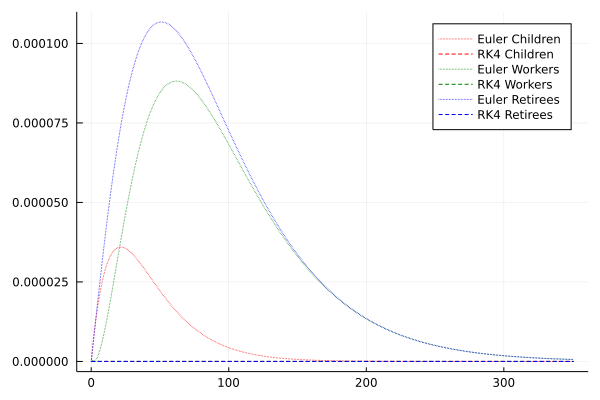

In [62]:
comparison(b, μ, β, γ, t0, c0, w0, r0)